<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.55


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=616a942a324d26c8c48f26496367c41f&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbnVNMzBnQV9uanl2YzN5bjhQQk00QTA0YkxKaUtRNGh1Q1UzUFBmcUM1aWZ1SGRVdElFNGZJVlhOTDh6VUZHZyIsInN0YXRlIjoiNjE2YTk0MmEzMjRkMjZjOGM0OGYyNjQ5NjM2N2M0MWYifQ==


In [4]:
# https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
# Updated: https://drive.google.com/file/d/17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C/view?usp=sharing
drive_download(as_id('17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C'), path = paste0('/content/fia.csv'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.csv') %>% st_as_sf(coords = c("LON","LAT"), crs = 4326) %>% data.table

File downloaded:

• 2023_11_01FIA_soil_subset.csv <id: 17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C>

Saved locally as:

• /content/fia.csv



Reading layer `fia' from data source `/content/fia.csv' using driver `CSV'


Warning message:
“no simple feature geometries present: returning a data.frame or tbl_df”


In [5]:
# https://drive.google.com/file/d/1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ/view?usp=drive_link
drive_download(as_id('1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ'), path = "/content/250_summary_grid_dt.gpkg", overwrite = TRUE)
grid_dt <- st_read("/content/250_summary_grid_dt.gpkg") %>% st_transform(4326) %>% data.table()

File downloaded:

• 250_summary_grid_full_dt.gpkg <id: 1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ>

Saved locally as:

• /content/250_summary_grid_dt.gpkg



Reading layer `250_summary_grid_full_dt' from data source 
  `/content/250_summary_grid_dt.gpkg' using driver `GPKG'
Simple feature collection with 227561 features and 35 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 57161.36 ymin: 16952.32 xmax: 572661.4 ymax: 381202.3
Projected CRS: NAD_1983_HARN_StatePlane_Hawaii_1_FIPS_5101


In [6]:
# Simulation data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1yHxFBwtddenPQnwWQdqQ_leMlocOHSFd'), path =  '/content/sim_results_Hawaii_Run6.gpkg', overwrite = FALSE)
sim_dt <- st_read( '/content/sim_results_Hawaii_Run6.gpkg') %>% data.table

File downloaded:

• sim_results_Hawaii_Run6.gpkg <id: 1yHxFBwtddenPQnwWQdqQ_leMlocOHSFd>

Saved locally as:

• /content/sim_results_Hawaii_Run6.gpkg



Reading layer `sim_results_Hawaii_Run6' from data source 
  `/content/sim_results_Hawaii_Run6.gpkg' using driver `GPKG'
Simple feature collection with 6092031 features and 69 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84


In [7]:
grid_int_dt  <- fia_dt$geom %>% st_transform(4135) %>% st_buffer(10000) %>% st_transform(4326) %>% st_intersects(grid_dt$geom)

In [8]:
rm_vec <- grid_int_dt %>% lapply(length) %>% unlist > 0
grid_int_dt <- grid_int_dt[rm_vec]
fia_dt <- fia_dt[rm_vec,]

In [9]:
grid_dt <- grid_dt[!is.na(srad),]

In [10]:
grid_dt$agbd_n <- grid_dt$agbd_n %>% as.numeric

In [11]:
fia_dt$Stock_SOC_Mg_Ha <- fia_dt$Stock_SOC_Mg_Ha %>% as.numeric

Warning message in fia_dt$Stock_SOC_Mg_Ha %>% as.numeric:
“NAs introduced by coercion”


In [12]:
sim_dt %>% names

[1] "PLOT"                       "Stock_SOC_Mg_Ha"           
 [3] "id"                         "left"                      
 [5] "top"                        "right"                     
 [7] "bottom"                     "water"                     
 [9] "trees"                      "grass"                     
[11] "flooded_vegetation"         "crops"                     
[13] "shrub_and_scrub"            "built"                     
[15] "bare"                       "snow_and_ice"              
[17] "max"                        "elevation"                 
[19] "landform"                   "SRTM_mTPI"                 
[21] "aet"                        "def"                       
[23] "pdsi"                       "pet"                       
[25] "pr"                         "ro"                        
[27] "soil"                       "srad"                      
[29] "swe"                        "tmmn"                      
[31] "tmmx"                       "vap"                       
[33] "vpd"                        "vs"                        
[35] "agbd_m"                     "agbd_sd"                   
[37] "agbd_n"                     "predicted"                 
[39] "var_imp_water"              "var_imp_trees"             
[41] "var_imp_grass"              "var_imp_flooded_vegetation"
[43] "var_imp_crops"              "var_imp_shrub_and_scrub"   
[45] "var_imp_built"              "var_imp_bare"              
[47] "var_imp_snow_and_ice"       "var_imp_max"               
[49] "var_imp_elevation"          "var_imp_landform"          
[51] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[53] "var_imp_def"                "var_imp_pdsi"              
[55] "var_imp_pet"                "var_imp_pr"                
[57] "var_imp_ro"                 "var_imp_soil"              
[59] "var_imp_srad"               "var_imp_swe"               
[61] "var_imp_tmmn"               "var_imp_tmmx"              
[63] "var_imp_vap"                "var_imp_vpd"               
[65] "var_imp_vs"                 "var_imp_agbd_m"            
[67] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[69] "r2"                         "geom"

In [13]:
sim_dt[,z:=(predicted-Stock_SOC_Mg_Ha)/Stock_SOC_Mg_Ha]

In [14]:
sim_summary_dt <- sim_dt[,list(unique = unique(PLOT) %>% length,length = length(PLOT),length_05 = length(PLOT[sqrt((z)^2) <0.05]),geom=unique(geom)),by=id]

In [15]:
sim_summary_dt %>% st_as_sf %>% st_write('sim_summary.gpkg',delete_dsn = T)

writing: substituting ENGCRS["Undefined Cartesian SRS with unknown unit"] for missing CRS



Deleting source `sim_summary.gpkg' failed
Writing layer `sim_summary' to data source `sim_summary.gpkg' using driver `GPKG'
Writing 43654 features with 4 fields and geometry type Point.


In [ ]:
sim_summary_dt %>%
  ggplot(aes(x=unique,y=length_05/length)) +
    geom_bin2d(bins=16) +
    geom_smooth(method = 'lm')

In [ ]:
# sim_dt[id ==2222069  ]
# 1850844
# sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05
sim_dt[id ==2832911  & sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05] %>%
  ggplot(aes(x=Stock_SOC_Mg_Ha)) +
  geom_histogram()
  # print()

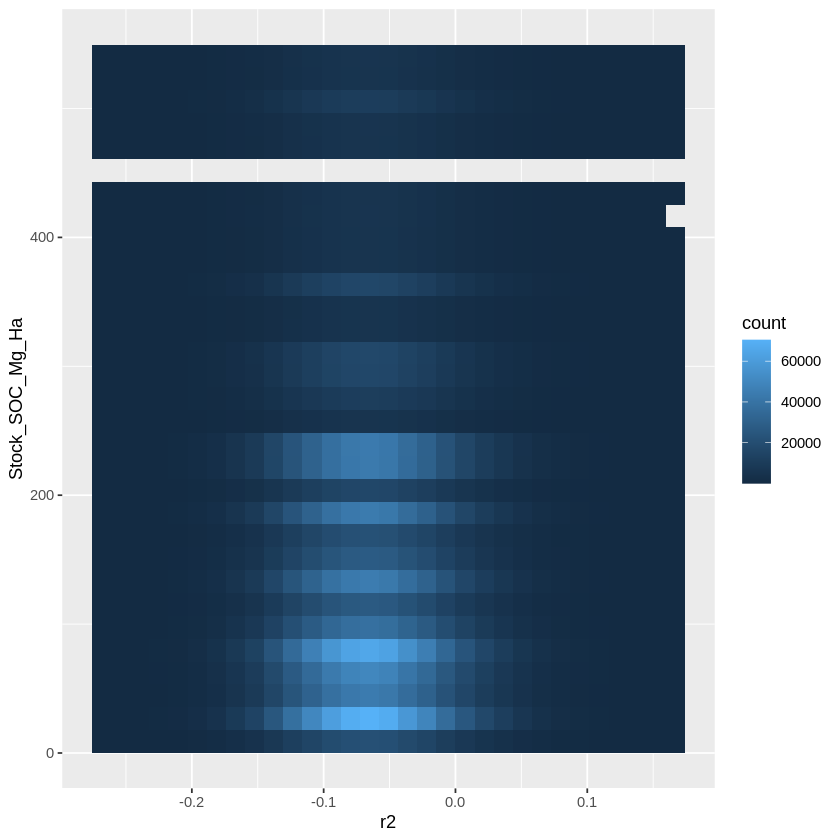

In [18]:
sim_dt %>%
  ggplot(aes(y=Stock_SOC_Mg_Ha,x=r2))+
    geom_bin2d()
    # geom_smooth()

In [19]:
# Load the necessary library
library(repr)

# Adjust width and height of plots
options(repr.plot.width=20, repr.plot.height=8)

In [21]:
# for(i in 1:10){

sim_dt[,residual := predicted-Stock_SOC_Mg_Ha]

sim_dt[,residual_per := residual/Stock_SOC_Mg_Ha]

samp_dt <- sim_dt[residual_per>-.05 &residual_per <.05]
plot <- sample(samp_dt$PLOT,1)
# print(plot)
(samp_dt[PLOT==plot] %>% melt(id.vars = c('PLOT','Stock_SOC_Mg_Ha','dummy_geom','water','trees','grass','flooded_vegetation','crops','shrub_and_scrub','built','bare','snow_and_ice','max','elevation','landform','SRTM_mTPI','aet','def','pdsi','pet','pr','ro','soil','srad','swe','tmmn','tmmx','vap','vpd','vs','predicted','residual','residual_per')) %>%
  ggplot(aes(x=variable,y=value))+
  geom_boxplot() )%>% plot
# }

ERROR: ignored

In [ ]:
dummy_geom <- grid_dt[grid_int_dt %>% lapply(function(x){sample(x,1)}) %>% unlist,] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(2500) %>% st_transform(4326)

In [ ]:
fia_dt$dummy_geom <- dummy_geom$geom

In [ ]:
example_poly <- (fia_dt %>%data.table)[,c('C_TOTAL_PCT','dummy_geom')]

In [ ]:
rf_dt <- data.table(example_poly,exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)

In [ ]:
# rf_dt

In [ ]:
names(rf_dt)[-c(1,2)] <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")


In [ ]:
rf_form <- as.formula(paste0('Stock_SOC_Mg_Ha~',paste((rf_dt %>% names)[-c(1,2)],collapse = '+')))
rf_form

In [ ]:
rf_terra <- randomForest(rf_form,rf_dt[complete.cases(rf_dt[,-2]),],verbose=T)
rf_terra %>% varImpPlot
rf_terra

In [ ]:
data.frame(field = rf_terra$y,predicted = rf_terra$predicted) %>%
  ggplot(aes(x=predicted,y=field))+
  geom_point()